In [1]:
import os
import sys
import pickle
import argparse
from scipy import sparse, io 
import numpy as np
import rpy2.robjects as robjects
import magic
import scprep
from sklearn.decomposition import NMF, non_negative_factorization, PCA
from sklearn.decomposition._nmf import _beta_divergence
import seaborn as sns
import pandas as pd
from scipy.sparse import csr_matrix, csc_matrix 


script_dir = "../"
sys.path.append(os.path.abspath(script_dir))
from file2 import *
from factorize import *
from smallsim_functions import simulate_multinomial_counts
from misc import *
from findK_correction_jk import *

import pdb

np.random.seed(123)

In [2]:
## load data
datadir = "../../../gdrive/github_data/pyJSMF-RAW-data"
dataname = "sla"
k = 6
rate=1

datafile=f"{datadir}/fit_sim_{dataname}_fastTopics_k{k}_rate{rate}.pkl"
with open(datafile, "rb") as f:
    fitted = pickle.load(f)
    
X = fitted['X'].toarray()
Lt = fitted['Ltrue'].T ## k by n
F = fitted['Ftrue']
idx = np.where((X > 0).sum(axis = 0) > 1)[0]
X = X[:, idx]
F = F[idx, :]
print(X.shape)

## true C
C = F @ Lt
C = (C @ C.T) / Lt.shape[1]
C /= C.sum()
Cbar = C / C.sum(axis = 1)[:, None]

C_ = compute_C_unbiased(X)
Cbar_ = C_ / C_.sum(axis = 1)[:, None]
Cr, _, _ = rectifyC(C_, k, "AP") 
Cr_bar = Cr / Cr.sum(axis = 1)[:, None]

(3207, 7573)
+ Start alternating projection
+ Finish alternating projection
  - Elapsed seconds = 59.9547



In [3]:
S0, diagR0, _ = findS(Cbar, k)
S1, diagR1, _ = findS(Cbar_, k)
S2, diagR2, _ = findS(Cr_bar, k)
S3, diagR3 = findS_correction_jk(X, Cbar_, C_, k, prior_family = "point_normal")
S4, diagR4 = findS_correction_jk(X, Cr_bar, Cr, k, prior_family = "point_normal")

[inference.findS] Start finding the set of anchor bases S...
+ Finish finding set S!
  - Discovered 6 basis vectors by [sparsePartial] method.
  - Elapsed time = 3.7511 seconds

[inference.findS] Start finding the set of anchor bases S...
+ Finish finding set S!
  - Discovered 6 basis vectors by [sparsePartial] method.
  - Elapsed time = 3.2132 seconds

[inference.findS] Start finding the set of anchor bases S...
+ Finish finding set S!
  - Discovered 6 basis vectors by [sparsePartial] method.
  - Elapsed time = 2.9284 seconds



In [4]:
print((S0, X.sum(axis = 0)[S0.astype(int)]))
print((S1, X.sum(axis = 0)[S1.astype(int)]))
print((S2, X.sum(axis = 0)[S2.astype(int)]))
print((S3, X.sum(axis = 0)[S3.astype(int)]))
print((S4, X.sum(axis = 0)[S4.astype(int)]))

(array([4195, 6834, 5238, 1879, 3683, 6410]), array([ 78., 910., 174., 155., 170., 352.]))
(array([7571, 5207, 4549, 4159, 5241, 5357]), array([4., 2., 2., 3., 7., 3.]))
(array([3589, 4300, 4143, 5900, 1939, 7218]), array([2., 2., 2., 2., 2., 3.]))
(array([7422, 5434,  330, 6840, 5235, 6088]), array([  3., 172.,   2., 544., 412., 737.]))
(array([5434, 6840, 5117, 6088, 2417, 7031]), array([172., 544., 330., 737., 149., 454.]))


### Compare against vanilla findK 

Note vanilla `findK` is not robust so simulated data from different seeds have very different results. Below I picked some bad results. Note that our robust `findK` si quite robust. 

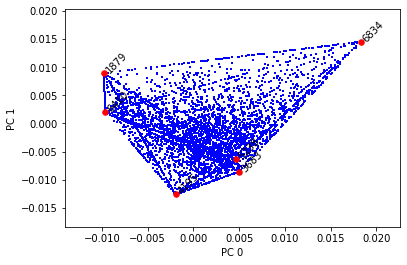

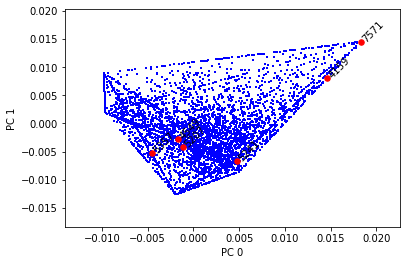

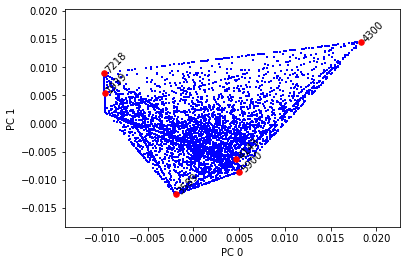

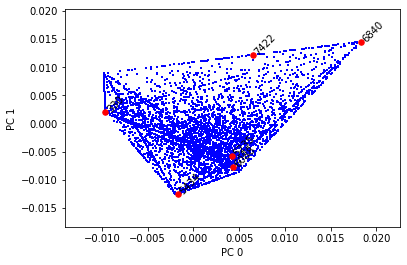

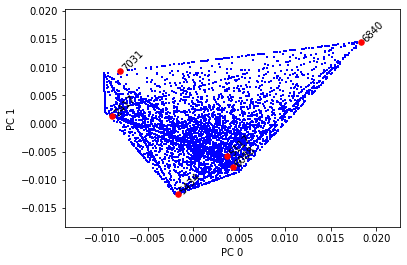

In [5]:
Cbar_pj = pca_proj(Cbar)
vis_extremal_pca(Cbar_pj, S0.astype(int), [0, 1], annotate=True, fontsize=10)
vis_extremal_pca(Cbar_pj, S1.astype(int), [0, 1], annotate=True, fontsize=10)
vis_extremal_pca(Cbar_pj, S2.astype(int), [0, 1], annotate=True, fontsize=10)
vis_extremal_pca(Cbar_pj, S3.astype(int), [0, 1], annotate=True, fontsize=10)
vis_extremal_pca(Cbar_pj, S4.astype(int), [0, 1], annotate=True, fontsize=10)

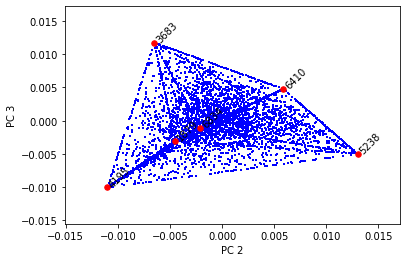

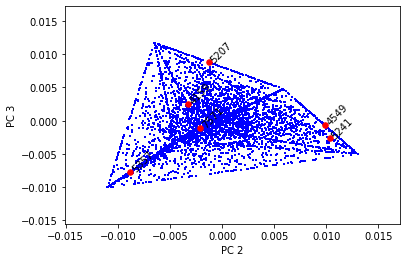

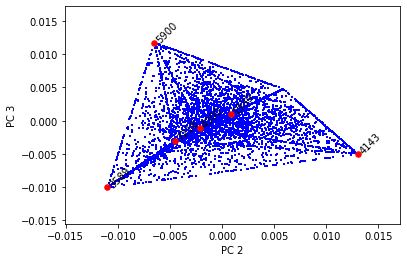

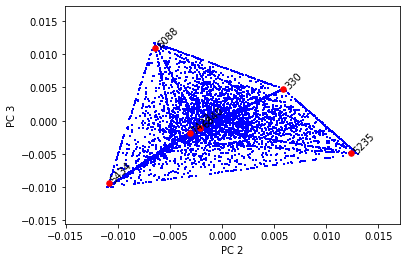

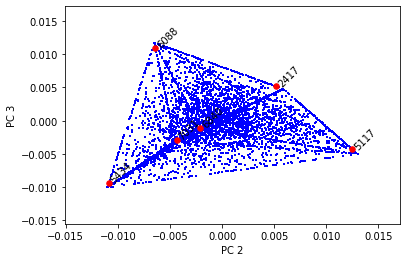

In [6]:
vis_extremal_pca(Cbar_pj, S0.astype(int), [2, 3], annotate=True, fontsize=10)
vis_extremal_pca(Cbar_pj, S1.astype(int), [2, 3], annotate=True, fontsize=10)
vis_extremal_pca(Cbar_pj, S2.astype(int), [2, 3], annotate=True, fontsize=10)
vis_extremal_pca(Cbar_pj, S3.astype(int), [2, 3], annotate=True, fontsize=10)
vis_extremal_pca(Cbar_pj, S4.astype(int), [2, 3], annotate=True, fontsize=10)